In [13]:
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [8]:
import numpy as np
import pandas as pd

# Assuming 'bikes' is already your DataFrame

# Convert 'dteday' to datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday'], format='%m/%d/%Y')

# Step 2: Create new features from the 'dteday' column
bikes['day_of_week'] = bikes['dteday'].dt.dayofweek  # 0 = Monday, 6 = Sunday
bikes['month'] = bikes['dteday'].dt.month            # Extract the month
bikes['year'] = bikes['dteday'].dt.year              # Extract the year

# 1. Cyclical transformation for 'hr'
bikes['hr_sin'] = np.sin(2 * np.pi * bikes['hr'] / 24)
bikes['hr_cos'] = np.cos(2 * np.pi * bikes['hr'] / 24)

# 2. Cyclical transformation for 'day_of_week' (0 = Monday, 6 = Sunday)
bikes['day_of_week_sin'] = np.sin(2 * np.pi * bikes['day_of_week'] / 7)
bikes['day_of_week_cos'] = np.cos(2 * np.pi * bikes['day_of_week'] / 7)

# 3. Cyclical transformation for 'month' (12 months in a year)
bikes['month_sin'] = np.sin(2 * np.pi * bikes['month'] / 12)
bikes['month_cos'] = np.cos(2 * np.pi * bikes['month'] / 12)

# 4. Cyclical transformation for 'season' (4 seasons in a year)
bikes['season_sin'] = np.sin(2 * np.pi * bikes['season'] / 4)
bikes['season_cos'] = np.cos(2 * np.pi * bikes['season'] / 4)

# Create a 'total' column by adding 'casual' and 'registered'
bikes['total'] = bikes['casual'] + bikes['registered']

# Drop 'casual' and 'registered' columns
bikes = bikes.drop(columns=['casual', 'registered'])

# Step 3: Drop the 'dteday' column since we've extracted useful information
bikes = bikes.drop(columns=['dteday'])



In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   hr               112475 non-null  float64
 1   temp_c           112475 non-null  float64
 2   feels_like_c     112475 non-null  float64
 3   hum              112475 non-null  float64
 4   windspeed        112475 non-null  float64
 5   weathersit       112475 non-null  int64  
 6   season           112475 non-null  int64  
 7   holiday          112475 non-null  int64  
 8   workingday       112475 non-null  int64  
 9   day_of_week      112475 non-null  int32  
 10  month            112475 non-null  int32  
 11  year             112475 non-null  int32  
 12  hr_sin           112475 non-null  float64
 13  hr_cos           112475 non-null  float64
 14  day_of_week_sin  112475 non-null  float64
 15  day_of_week_cos  112475 non-null  float64
 16  month_sin        112475 non-null  floa

In [10]:
x=bikes.drop(columns=['total'])
y=bikes['total']

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



In [20]:
#build the ultimate model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Input layer and first hidden layer
# Dense(128) means 128 neurons, input_dim is set to the number of features
# Activation is 'relu' to introduce non-linearity (better than 'sigmoid' for performance)
model.add(Dense(128, input_dim=len(x_train[0]), activation='relu'))
# BatchNormalization helps the network converge faster by normalizing activations
model.add(BatchNormalization())
# Dropout helps prevent overfitting by randomly dropping 50% of the neurons
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(256, activation='relu'))
# Adding batch normalization for faster training and more stability
model.add(BatchNormalization())
# Dropout to regularize and reduce overfitting
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(64, activation='relu'))
# You can add batch normalization here if needed
# Dropout to prevent overfitting
model.add(Dropout(0.3))

# Output layer
# A single output neuron with 'linear' activation because you're doing regression (predicting a continuous variable)
model.add(Dense(1, activation='linear'))

# Compile the model
# 'adam' optimizer is a good default choice for neural networks
# Mean Squared Error (MSE) is commonly used for regression problems
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,761 (210.00 KB)

 Trainable params: 52,993 (207.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [21]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 82616.6016 - mae: 182.8685 - val_loss: 22654.5605 - val_mae: 95.9093
Epoch 2/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 33128.4141 - mae: 120.4148 - val_loss: 18708.5312 - val_mae: 85.5926
Epoch 3/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 30297.8848 - mae: 114.3522 - val_loss: 17120.5684 - val_mae: 81.0875
Epoch 4/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 28185.7422 - mae: 110.3154 - val_loss: 16213.8506 - val_mae: 77.9900
Epoch 5/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 27881.2012 - mae: 109.6014 - val_loss: 15815.4883 - val_mae: 77.3791
Epoch 6/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 27820.9785 - mae: 108.9856 - val_loss: 17100.4355 - val_mae: 80.0701
Epoch 7/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 26440.7402 - mae: 107.0833 - val_loss: 15448.5811 - val_mae: 75.9062
Epoch 8/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 26030

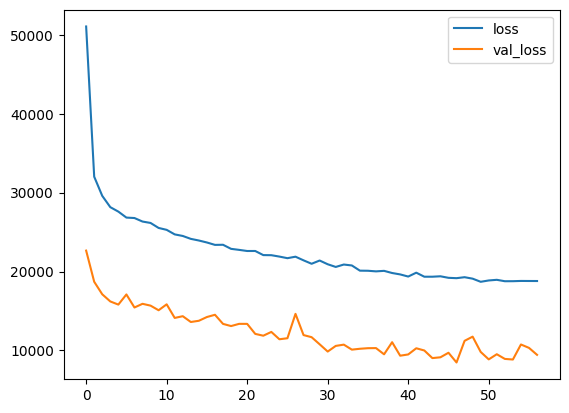

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [25]:
predictions = model.predict(x_test)

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
predictions

array([[ 562.4728  ],
       [  15.357072],
       [  49.075523],
       ...,
       [  15.357072],
       [1113.8629  ],
       [ 109.897255]], dtype=float32)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8358.416633808656
R-squared: 0.9280946850776672


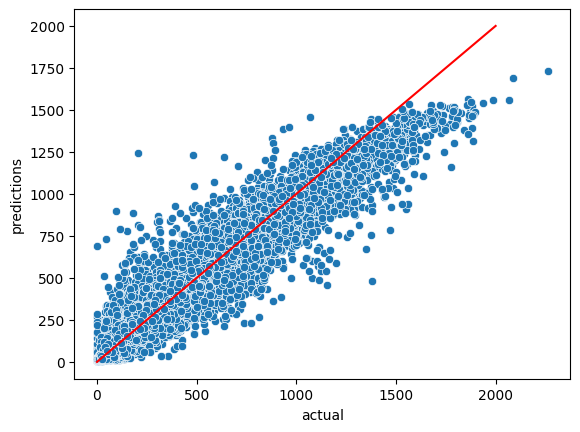

In [30]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,2000)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

In [31]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

,predictions,actual,difference
0,562.472778,568,5.527222
1,15.357072,12,-3.357072
2,49.075523,30,-19.075523
3,13.376281,5,-8.376281
4,481.925964,620,138.074036
...,...,...,...
22490,34.356197,22,-12.356197
22491,658.622559,697,38.377441
22492,15.357072,24,8.642928
22493,1113.862915,1261,147.137085


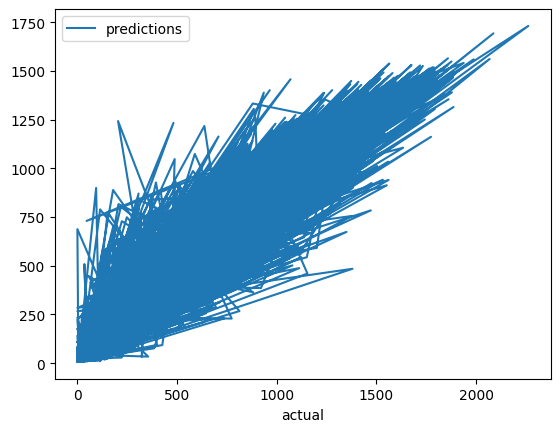